# Face recognition with SVM 🎭🎭

Let's attempt face recognition with SVM, the goal of this exercise will be to classify pictures in the category representing the subject present in the picture.

0. Import usual libraries

In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

import pandas   as pd
import numpy    as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.metrics import classification_report


1. Use `sklearn.datasets` to import `fetch_lfw_people`

Include these in a DataFrame, set `min_faces_per_person` to 60, we need classes that are represented by enough observations.

The object you have imported contains several different objects, one of them is called `DESCR`, print it and read it, it will inform you on the data you are working with. If you're stuck, have a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) 😉

In [3]:
# faces = fetch_lfw_people(min_faces_per_person=60, resize=0.4)
faces = fetch_lfw_people(min_faces_per_person=60)
# print(faces.DESCR)


In [4]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

2. What are the different categories in the variable ```target_names```

In [5]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

3. What is the ```shape``` of the variable images

In [6]:
faces.images.shape

(1348, 62, 47)

---> This is a three dimensional array , the first dimension represents the number of images, the second and third respectively represent the width and height of the images in the dataset.

4. In plotly express, you will find an ```imshow()``` method which lets you visualize images. Try and visualise an image in your dataset. Try adding the associated label as xlabel.

In [7]:
fig = px.imshow(faces.images[1])
fig.show()



In [8]:
fig = px.imshow(faces.images[1], binary_string=True)
fig.show()

5. The code below will display the 15 first images of the dataset. It's a bit tricky but you can try to understand how it works 🤓

Hint : this [stackoverflow dicussion](https://stackoverflow.com/questions/66046467/how-to-change-titles-facet-col-in-imshow-plotly) describes something quite similar


In [9]:
# faces = dataset.copy()

In [10]:
fig = px.imshow(faces.images[0:15], facet_col=0, facet_col_wrap = 5, binary_string=True)
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
item_map={f'{i}':key for i, key in enumerate(faces.target_names[faces.target[0:15]])}
fig.for_each_annotation(lambda a: a.update(text=item_map[a.text.split("=")[1]]))

5. Declare an instance of the `SVC` class from `sklearn.svm`. Make sure the kernel is a radial basis function, and set the `class_weight` argument ton "balanced".

In [11]:
svm = SVC(kernel = 'rbf', class_weight="balanced") 


6. Split your data between a train and a test set. If some preprocessing is necessary, apply it to the train and test sets.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(faces.data, faces.target, test_size = 0.3, random_state=0, stratify=faces.target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pas besoin de label encoder sur Y
# C'est déjà fait
# encoder = LabelEncoder()
# Y_train = encoder.fit_transform(Y_train)
# Y_test = encoder.transform(Y_test)


7. Fit your model on your training data. What is the generalized accuracy of the model?

In [13]:
svm.fit(X_train, Y_train)

# Y_train_pred = svm.predict(X_train)
# Y_test_pred = svm.predict(X_test)


SVC(class_weight='balanced')

In [14]:
# print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
# print("accuracy on test set     : ", accuracy_score(Y_test, Y_test_pred))
print("accuracy on train set     : ", svm.score(X_train, Y_train))
print("accuracy on test  set     : ", svm.score(X_test, Y_test))

accuracy on train set     :  0.9650053022269353
accuracy on test  set     :  0.7654320987654321


8. Let's attempt to improve the score by finding the best set of hyper-parameters for this model. Use GridSearchCV to do so.

In [15]:
svm = SVC(kernel = 'rbf', class_weight="balanced") 

params = {
    'C'    : [0.1, 1.0, 10.0],
    'gamma': [0.0001, 0.001, 0.1]
}
gridsearch = GridSearchCV(svm, param_grid=params, cv = 3, verbose=3, n_jobs=-1) 
# gridsearch.fit(X_train, Y_train)


In [16]:
# svm = SVC(kernel = 'rbf', class_weight="balanced") 

# params = {
#     'C'    : [9.0, 10.0, 11.0, 12.0, 13.0, 14.0],
#     'gamma': [0.00001, 0.0001, 0.001, 0.01]
# }
# gridsearch = GridSearchCV(svm, param_grid=params, verbose=3, n_jobs=-1, cv=3) 



In [17]:
gridsearch.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': [0.0001, 0.001, 0.1]},
             verbose=3)

In [18]:
print("Best hyperparameters : ", gridsearch.best_params_)

Best hyperparameters :  {'C': 10.0, 'gamma': 0.0001}


In [19]:
print("Best hyperparameters : ", gridsearch.best_score_.round(3))

Best hyperparameters :  0.818


In [20]:
svm.fit(X_train, Y_train)

print("accuracy on train set    : ", svm.score(X_train, Y_train).round(3))
print("accuracy on test  set    : ", svm.score(X_test, Y_test).round(3))

accuracy on train set    :  0.965
accuracy on test  set    :  0.765


9. Analyze the model's confusion matrix, then use the classification_report function

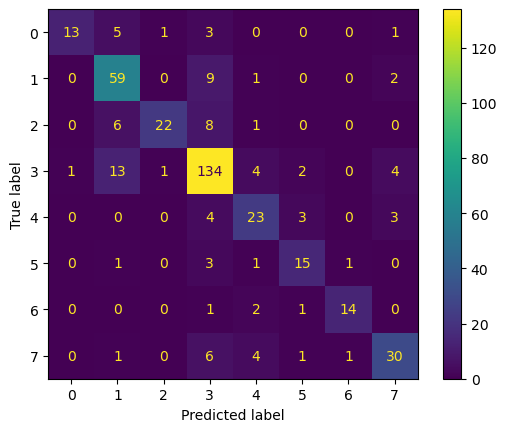

In [21]:
fig, ax = plt.subplots()  
ConfusionMatrixDisplay.from_estimator(svm, X_test, Y_test, ax=ax)
plt.show()


In [25]:
Y_test_pred = gridsearch.predict(X_test)
print(classification_report(Y_test,Y_test_pred, target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.75      0.65      0.70        23
     Colin Powell       0.84      0.89      0.86        71
  Donald Rumsfeld       0.89      0.65      0.75        37
    George W Bush       0.88      0.93      0.90       159
Gerhard Schroeder       0.78      0.85      0.81        33
      Hugo Chavez       0.90      0.86      0.88        21
Junichiro Koizumi       1.00      0.78      0.88        18
       Tony Blair       0.77      0.79      0.78        43

         accuracy                           0.85       405
        macro avg       0.85      0.80      0.82       405
     weighted avg       0.85      0.85      0.85       405



10. Let's try looking at a few images and the predictions the model makes on them. Like we did at the beginning of the exercise, the code below displays a collection of images with the corresponding predictions.

In [ ]:
images = np.array([X.reshape(62,47) for X in X_test[0:15]])

fig = px.imshow(images, facet_col=0, facet_col_wrap = 5, binary_string=True)
fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
item_map={f'{i}':key for i, key in enumerate(faces.target_names[Y_test[0:15]])}
fig.for_each_annotation(lambda a: a.update(text=item_map[a.text.split("=")[1]]))

## Wanna go further?

--> [Great Medium Article](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)